# Matemática para inteligencia Artificial


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imsave
from matplotlib.pyplot import imread
import os


FILEPATH_PRADERA = os.getcwd()+'\imagen.jpg'
FILEPATH_TANGO = os.getcwd()+'\\tango.jpg'
FILEPATH_TIERRA = os.getcwd()+'\\tierra.jpg'

images = [FILEPATH_PRADERA, FILEPATH_TANGO, FILEPATH_TIERRA]

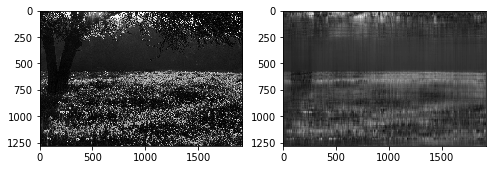

Cantidad de valores singulares tomados: 12
La reducción de la imagen es de: 358.282%


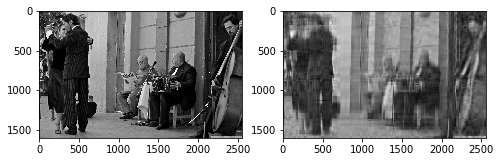

Cantidad de valores singulares tomados: 16
La reducción de la imagen es de: 87.266%


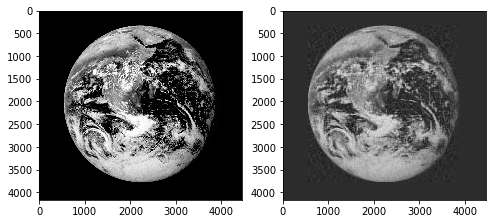

Cantidad de valores singulares tomados: 41
La reducción de la imagen es de: 115.613%


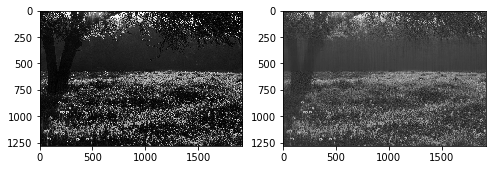

Cantidad de valores singulares tomados: 128
La reducción de la imagen es de: 128.523%


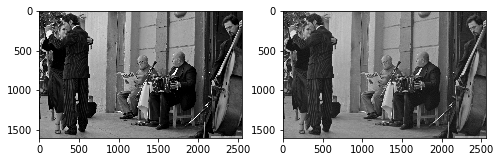

Cantidad de valores singulares tomados: 160
La reducción de la imagen es de: 20.643%


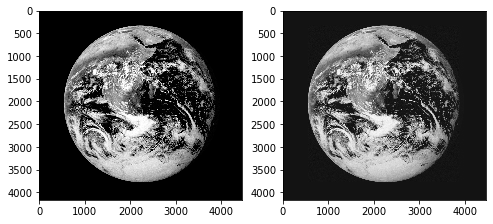

Cantidad de valores singulares tomados: 416
La reducción de la imagen es de: 17.612%


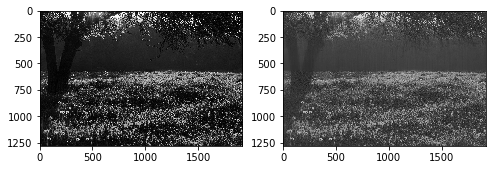

Cantidad de valores singulares tomados: 256
La reducción de la imagen es de: 92.527%


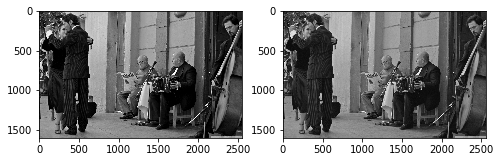

Cantidad de valores singulares tomados: 320
La reducción de la imagen es de: 8.382%


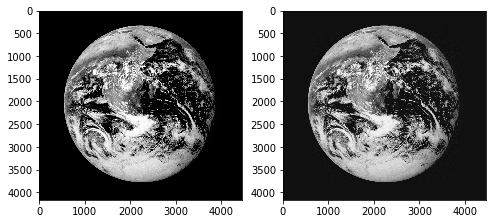

Cantidad de valores singulares tomados: 832
La reducción de la imagen es de: 6.670%


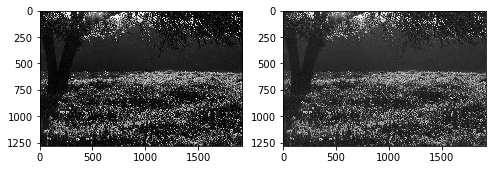

Cantidad de valores singulares tomados: 640
La reducción de la imagen es de: 50.645%


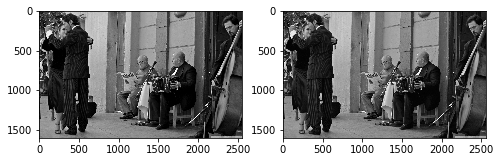

Cantidad de valores singulares tomados: 800
La reducción de la imagen es de: 0.386%


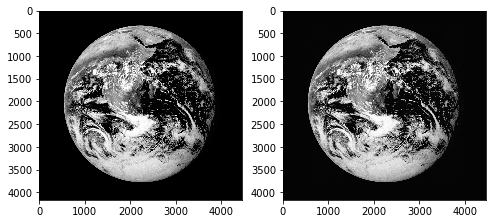

Cantidad de valores singulares tomados: 2081
La reducción de la imagen es de: 0.146%


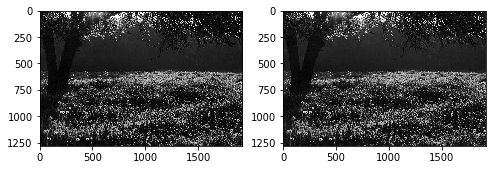

Cantidad de valores singulares tomados: 1024
La reducción de la imagen es de: 30.604%


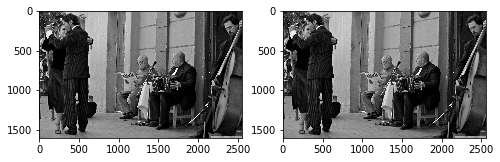

Cantidad de valores singulares tomados: 1280
La reducción de la imagen es de: 0.026%


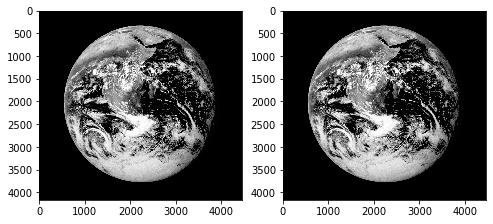

Cantidad de valores singulares tomados: 3330
La reducción de la imagen es de: 0.015%


In [130]:
percentage = 0.2
percentages = [0.01, 0.1, 0.2, 0.5, 0.8]

sv_reduction = []

for percentage in percentages:
    for image in images:


        img_orig = imread(image)
        A = np.mean(img_orig, -1)

        n_sv= np.min(A.shape)

        k = int(percentage * n_sv)

        U, S, VT = np.linalg.svd(A)
        S = np.diag(S)



        Ared = U[:,:k] @ S[:k, :k] @ VT[:k,:]

        fig=plt.figure(figsize=(8, 8))

        fig.add_subplot(1, 2, 1)

        img = plt.imshow(A)
        img.set_cmap('gray')

        fig.add_subplot(1, 2, 2)

        img = plt.imshow(Ared)
        img.set_cmap('gray')

        plt.show()

        imsave(image[:-4]+'_red.jpg', Ared, cmap='gray')

        sizeOrig = os.stat(image).st_size
        sizeRed = os.stat(image[:-4]+'_red.jpg').st_size
        reduc = (sizeOrig/sizeRed - 1)
        
        #Distancia entre matriz A y Ared
        dist = np.sum((A - Ared)**2)**0.5
        
        sv_reduction.append([image[-10:], percentage, k, reduc, dist])

        print(f'Cantidad de valores singulares tomados: {k}')
        print(f'La reducción de la imagen es de: {reduc:.3%}')

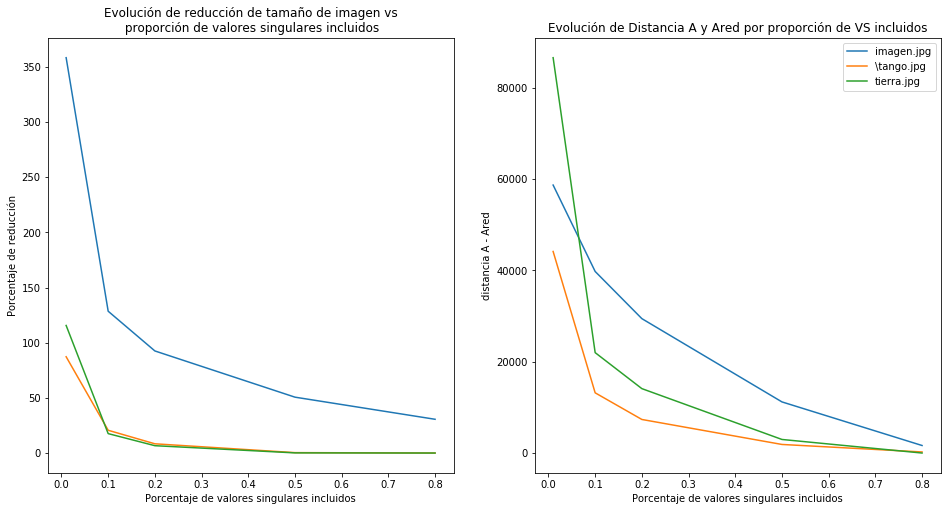

In [158]:
fig, ax = plt.subplots(1,2, figsize=[16,8])

for j in range(3):
    image = []
    x = []
    y = []
    dist = []
    for i in range(5):
        image.append(sv_reduction[3*i + j][0])
        x.append(sv_reduction[3*i + j][1])
        y.append(sv_reduction[3*i + j][3]*100)
        dist.append(sv_reduction[3*i + j][4])

    ax[0].plot(x,y, label=image[j])
        
    ax[1].plot(x,dist, label=image[j])
    
    
ax[0].set_title('Evolución de reducción de tamaño de imagen vs\n proporción de valores singulares incluidos')
ax[1].set_title('Evolución de Distancia A y Ared por proporción de VS incluidos')

ax[0].set_xlabel('Porcentaje de valores singulares incluidos')
ax[1].set_xlabel('Porcentaje de valores singulares incluidos')

ax[0].set_ylabel('Porcentaje de reducción')
ax[1].set_ylabel('distancia A - Ared')


plt.legend()
plt.show()